# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

import OmicsIntegrator as oi

In [2]:
interactome_file = "../interactomes/inbiomap.9.12.2016.exp.oi2"
prize_file = "./example_prizes.tsv"
graph = oi.Graph(interactome_file, {'g':5})

In [3]:
graph.prepare_prizes(prize_file)

04:12:04 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
04:12:04 - OI2: INFO - ['TGFB1']
04:12:04 - OI2: INFO - Members of the prize file not present in the interactome:
04:12:04 - OI2: INFO - ['AIM1', 'APOL3', 'ATP6V0E1', 'CXorf36', 'FAM198B', 'FAM63B', 'GLT25D1', 'NORAD', 'PRR29', 'RP6-99M1.2', 'TNFSF4']


In [4]:
vertex_indices, edge_indices = graph.pcsf()

In [5]:
len(vertex_indices)

93

In [6]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/OmicsIntegrator2/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


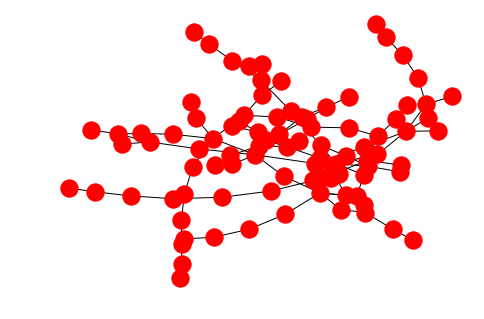

In [7]:
nx.draw_spring(augmented_forest)

In [8]:
graph.pcsf_objective_value(forest)

638.3993087190331

In [9]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,prize,Base_Mean,log2FC,StdErr,Wald_Stats,P_value,P_adj,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function
ABCD1,5.517830,206.706956,-2.835321,0.183205,15.476223,5.020961e-54,1.648218e-52,True,protein,16,0.000000,0,peroxisome,cellular process,cellular component organization,transporter,lipid transporter
ADD3,2.924647,2596.830442,2.311630,0.062866,-36.770760,5.417044e-296,3.430129e-293,True,protein,25,0.000000,5,nucleus,cellular process,cellular component organization,structural molecule,structural constituent of cytoskeleton
AMOTL2,2.930907,3096.331203,-1.954230,0.053089,36.810636,1.247823e-296,8.114896e-294,True,protein,79,0.000000,7,cytoplasm,cellular process,cell communication,binding,protein binding
AP2A1,1.135907,2452.825093,1.391865,0.060715,-22.924545,2.644816e-116,2.566111e-114,True,protein,101,0.178466,7,golgi,biological regulation,regulation of biological process,binding,protein binding
BACE1,1.243755,1469.981300,2.035023,0.084830,-23.989391,3.588534e-127,4.212063e-125,True,protein,24,0.063784,0,golgi,metabolic process,nitrogen compound metabolic process,catalytic,hydrolase


In [10]:
oi.output_networkx_graph_as_interactive_html(augmented_forest, output_dir='/Users/alex/Desktop/')

PosixPath('/Users/alex/Desktop/graph.html')